# Prediction of music listening (Part I): Data Visualization

This notebook deals with data visualization from the KKbox dataset. It enables us to have a good vision of the problem and to use all the possibilities of the data provided to make our predictions.


We have chosen to focus only on userID and songID to make our predictions. We didn't use the artist nor other feature related to the songs.

This notebook was executed on Jupyter.

In [0]:
# Importations
import os
import sys
import re
import random
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from time import time
import seaborn as sns
import pyspark.sql.functions as func

base = "/mnt/workspace/kkbox"
df = pd.read_csv(base + "/train.csv")
songs = pd.read_csv(base + "/songs.csv")

ModuleNotFoundError: ignored

The first thing to do when we are discovering a new dataset is exploring it. Here are some basic plots.

In [0]:
print('Number of listening events: ', df.shape[0])
print('Number of unique users: ', df["msno"].nunique())
print('Number of unique songs: ',df["song_id"].nunique())
print('Global vision of the table: ')
print('\nmsno=user_id \ntarget=1 when the song has been listened more than once during the last month')
df.head(10)

NameError: ignored

Here, we are grouping data to do TOP lists. We want to have an idea of the maximum values.

In [0]:
# Number of listenings per songID
grouped_songs = df.groupby('song_id', as_index = False).msno.agg({'number of listenings':'count'}).sort_values('number of listenings', ascending=0)
grouped_songs.sort_values('number of listenings', ascending=0).head(10)

,song_id,number of listenings
313171,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,13973
175398,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,13293
338865,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,13079
101401,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,12855
155979,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=,12004
204765,YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=,11835
136455,M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=,11745
181045,U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=,11521
34669,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,11131
230572,cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=,10791


In [0]:
# Number of unique songs listened by userID
grouped_usrs = df.groupby('msno', as_index = False).song_id.agg({'number of songs listened':'count'}).sort_values('number of songs listened', ascending=0)
grouped_usrs.sort_values('number of songs listened', ascending = 0).head(10)

,msno,number of songs listened
11658,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,5819
25014,o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=,5537
8158,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,5511
10550,KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=,4217
19681,cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=,4008
21924,hYJpPvGod6vy09TnlXdQe3Q0vlxju5u5Ruf8V2XkTio=,3926
14552,SZ5NNypqaTWljFO1HiVZwkw3713+rM9x/JNdJd8/fzc=,3733
19989,dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=,3686
12590,OOUnJuX4SteRhUdJZ9B2DqtfiwsfcZVBefEhXLeBsFg=,3239
21126,frZtrrN1Y2ZqZX3VFiq7FpAvLth3kZJNovT9cmyn2O4=,3177


In [0]:
# Wrap up
print('Mean nb of listened songs = ', np.mean(grouped_usrs['number of songs listened']))
print('Std nb of listened songs = ', np.std(grouped_usrs['number of songs listened']))

mean nb of listened songs =  239.877028126
std nb of listened songs =  314.125681139


In [0]:
# Join on the songID to have the artist name
usrArtist = pd.merge(df, songs, on='song_id', how='inner')

# Number of songs from one artist listened per userID
grouped_artists = usrArtist.groupby('artist_name',as_index = False).song_id.agg({'number of songs listened from this artist':'count'}).sort_values('number of songs listened from this artist', ascending = 0)
grouped_artists.sort_values('number of songs listened from this artist', ascending = 0).head(10)

,artist_name,number of songs listened from this artist
31960,Various Artists,303616
35441,周杰倫 (Jay Chou),186776
34699,五月天 (Mayday),182088
37130,林俊傑 (JJ Lin),115325
38025,田馥甄 (Hebe),104946
33659,aMEI (張惠妹),82799
39595,陳奕迅 (Eason Chan),76035
37964,玖壹壹,70445
10925,G.E.M.鄧紫棋,67296
2898,BIGBANG,61927


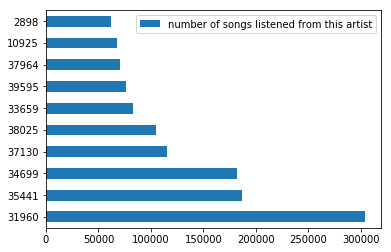

In [0]:
# TOP 10 of the most listened artists and the number of times their songs were listened
grouped_artists.head(10).plot.barh()

After visualizing data, we would like to have an idea of its repartition, using the cumulative distribution function. We also want to know the repartition of the most listened artists. (What is the ratio of listening between the TOP 10 most listened artists ?)

Text(0.5,1,'ECDF of number of play counts per Artist ID')

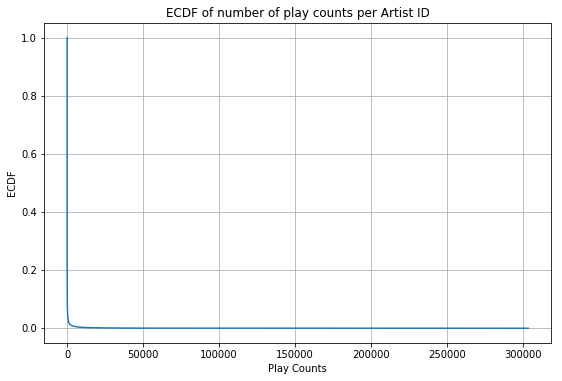

In [0]:
Y = grouped_artists['number of songs listened from this artist']
yvals = np.arange(len(Y)) / float(len(Y))

# Cumulative Distribution Function
plt.figure(figsize = (20,20))
plt.subplot(3, 2, 1)
plt.plot(Y, yvals)
plt.xlabel('Play Counts')
plt.ylabel('Empirical Cumulative Distribution Function')
plt.grid(True, which = 'both', ls = '-')
plt.title('Empirical Cumulative Distribution Function of nb of play counts per ArtistID')

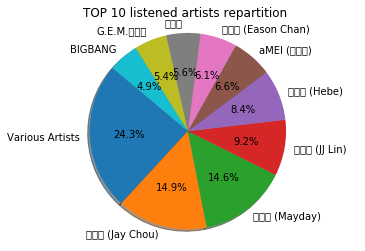

In [0]:
labels = grouped_artists['artist_name'].head(10)

# Ratio of listenings TOP 10 artists
plt.pie(grouped_artists['number of songs listened from this artist'].head(10), labels = labels,
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('TOP 10 listened artists repartition')
plt.axis('equal')
plt.show()

We define the notion of **curiosity** by the number of different songs played during the last month. **Pickyness** is ration between the number of songs listened again and the curiosity.

In [0]:
curiosity = df.groupby('msno').count()
listened_again = df.groupby('msno')['target'].sum()

pickyness = curiosity.join(listened_again, listened_again.msno == curiosity.msno)\
    .select('sum(playCount)','count')\
    .sample(False, 0.3)\
    .collect()

#PlayCounts vs curiosity for each user
plt.scatter(playCounts, curiosity, 0.1)
ax = plt.gca()
plt.xlabel('PlayCounts')
plt.ylabel('Curiosity')
plt.show()

#Spearmans correlation
print('Correlation songs played / songs played multiple times =', sp.stats.spearmanr(playCounts, curiosity).correlation)